The data science journey of every data science aspirant being with the most basic and important algorithm in data science, Linear Regression.

Linear regression,is the most important algorithm and finds its application in artificial intelligence and machine learning.

Regression techniques are used in machine learning to predict continuous values, for example predicting profits, age, . Linear regression is the type of regression in which the correlation between the dependent and independent factors can be represented in a linear fashion. Linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables. 

When there is only one explanatory variable we call this as a Simple linear regression.Simple Linear Regression is the type of regression in which a single independent variable is used to predict the values of the dependent variable.





We will perform the following steps to build a Simple Linear Regressor using a very simple dataset. 

* Data Preprocessing

  * Importing the libraries.
  * Importing dataset.
  * Dealing with the categorical variable.
  * Classifying dependent and independent variables.
  * Splitting the data into a training set and test set.
  * Feature scaling.

* Linear Regression

  * Create a Linear Regression.
  * Feed the training data to the regressor model.
  * Predicting the scores for the test set.
  * Using the RMSE to measure the performance.


<h1>Load the Dependencies</h1>

In [2]:
import ipywidgets as widgets
from IPython.display import display

style = {'description_width': 'initial'}

In [3]:
#1 Importing essential libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#Load the Dataset

In [4]:
#2 Importing the dataset

file_name = '/content/sample_data/Salary_Data.csv'
dataset = pd.read_csv(file_name)

In [5]:
#Displaying the dataset
dataset.head(8)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0


In [6]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

Dataset has 30 rows and 2 columns.


In [7]:
#Plotting the relation between salary and experience
wig_col = widgets.Dropdown(
                options=dataset.columns.tolist(),
                description='Choose a Column to Plot vs. Salary',
                disabled=False,
                layout=widgets.Layout(width='40%', height='40px'),
                style=style)

#Plot Variables

Dropdown(description='Choose a Column to Plot vs. Salary', layout=Layout(height='40px', width='40%'), options=…

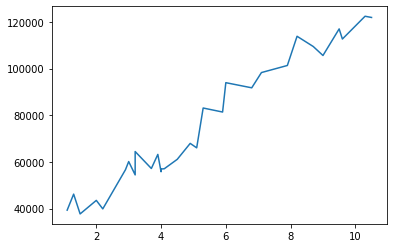

In [8]:
display(wig_col)
plt.plot(dataset[str(wig_col.value)], dataset['Salary']);

In [9]:
#3 classify dependent and independent variables
X = dataset.iloc[:,:-1].values  #independent variable YearsofExperience
y = dataset.iloc[:,-1].values  #dependent variable salary

In [10]:
print("\nIdependent Variable (Experience):\n\n", X[:5])
print("\nDependent Variable (Salary):\n\n", y[:5])


Idependent Variable (Experience):

 [[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]

Dependent Variable (Salary):

 [39343. 46205. 37731. 43525. 39891.]


#Create Train and Test Sets

In [11]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split
test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size :", tooltips=['Usually 20-30%'])
display(test_size)

FloatSlider(value=0.2, description='Test Size :', max=0.6, min=0.01)

In [12]:
#Divide the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=test_size.value, random_state = 0) 

In [13]:
print("Training Set :\n----------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test[:5])
print("y = \n", y_test[:5])

Training Set :
----------------

X = 
 [[9.6]
 [4. ]
 [5.3]
 [7.9]
 [2.9]]
y = 
 [112635.  55794.  83088. 101302.  56642.]


Test Set :
----------------

X = 
 [[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]]
y = 
 [ 37731. 122391.  57081.  63218. 116969.]


In [14]:
print(f"Shape of Training set is {X_train.shape}")
print(f"Shape of Testing set is {X_test.shape}")

Shape of Training set is (24, 1)
Shape of Testing set is (6, 1)


#Apply Linear Regression

In [15]:
"""# II. Simple Linear Regressor """

#5 import SLR library
from sklearn.linear_model import LinearRegression

# configure params for the model.
fit_int_wig = widgets.ToggleButtons(
                options=['TRUE', 'FALSE'],
                description='Fit Intercept :',
                disabled=False,
                style=style,
                tooltips=['whether to calculate the intercept for this model. If set to False,\
                          no intercept will be used in calculations.'])

display(fit_int_wig)

norm_wig = widgets.ToggleButtons(
                value='FALSE',
                options=['TRUE', 'FALSE'],
                description='Normalize :',
                disabled=False,
                tooltips=['This parameter is ignored when fit_intercept is set to False. \
                            If True, the regressors X will be normalized before regression by \
                            subtracting the mean and dividing by the l2-norm.'],
                style=style)

display(norm_wig)

njobs_wig = widgets.Dropdown(options=[('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1)], 
                             description="Number of CPU Cores = ", style=style)

display(njobs_wig)

ToggleButtons(description='Fit Intercept :', options=('TRUE', 'FALSE'), style=ToggleButtonsStyle(description_w…

ToggleButtons(description='Normalize :', index=1, options=('TRUE', 'FALSE'), style=ToggleButtonsStyle(descript…

Dropdown(description='Number of CPU Cores = ', options=(('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1…

In [16]:
#6 Train the Regressor with training set
regressor = LinearRegression(fit_intercept=fit_int_wig.value, normalize=norm_wig.value,
                            n_jobs=njobs_wig.value)

#fit the linear model
regressor.fit(X_train, y_train)

#7 predict the outcome of test sets
y_Pred = regressor.predict(X_test)
print("\nPredictions = ", y_Pred)


Predictions =  [ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [17]:
#8 Claculating the Accuracy of the predictions
from sklearn import metrics
print("Prediction Accuracy = ", metrics.r2_score(y_test, y_Pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Salaries \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_Pred,
                         "Abs. Error" : np.abs(y_test - y_Pred)})

error_df

Prediction Accuracy =  0.988169515729126

Actual vs Predicted Salaries 
------------------------------



,Actual,Predicted,Abs. Error
0,37731.0,40748.961841,3017.961841
1,122391.0,122699.622956,308.622956
2,57081.0,64961.657170,7880.657170
3,63218.0,63099.142145,118.857855
4,116969.0,115249.562855,1719.437145
5,109431.0,107799.502753,1631.497247


# Actual vs. Predicted 


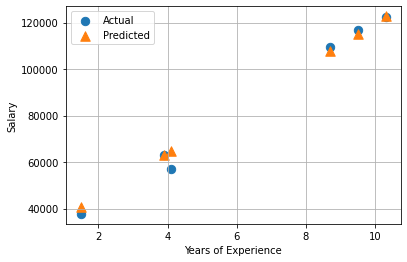

In [18]:
#Plotting Actual observation vs Predictions
plt.scatter(X_test,y_test, s = 70, label='Actual')
plt.scatter(X_test,y_Pred, s = 90, marker = '^', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend();
plt.grid();
plt.show();


# Excercise 

In [19]:
# Evaluate different Regression metrics

from sklearn.metrics import mean_squared_error

In [20]:
## implement the rmse metric to calculate the RMSE(Root Mean Squared Error)


"""Hint : Replace y_true and y_pred with the right variables in the notebook.
          Also, don't forget to add the squared_root part to reach RMSE score."""

print(f"Root Mean Squared Error : {mean_squared_error(y_true=None, y_pred=None)}")



ValueError: ignored